# Boiler plate imports to access the library functions that do what we need for the problem

In [2]:
import numpy as np # default math operations and access to things like pi, sin, cos, etc
from scipy.integrate import solve_ivp # analog to ode45, solves an initial value problem
import matplotlib.pyplot as plt # used for generating plots

# List of variables from the question the user can update as needed

In [3]:
# Length
l = 1 #m

# Stiffness
k = 1110 #N/m

# Damping
c = 31.5 #Ns/m

# Mass
m = 4.5 #kg

# Force
Fo = 15 #N

# Angular Velocity
w = 10 #rad/s

# Define initial conditions and time for the simulation to run

In [9]:
# Initial Angle
theta_o = 0.175 #rad

# Initial Angular Velocity
w_o = 0.5 #rad/s

# Length of sim
t = 2 #s

# Resolution of sim
n = 1000 #points/second

# Define the equations of motion of the two cases

In [5]:
# Function that returns the equation of motion of either case, depending on the value passed to caseNum (1 or 2)
def makecase(m, l, k, c, F, omega, caseNum = 1):

    # Define J for a slender rod rotating about its end
    J = 1.0/3.0 * m * l**2

    # Define equivalent forms of k and c depending on their placement
    if caseNum == 1:
        k_equiv = 9.0*k*l**2/16.0
        c_equiv = c*l**2
    elif caseNum == 2:
        k_equiv = k*l**2
        c_equiv = 9.0*c*l**2/16.0
    else:
        raise ValueError("There are only two cases so caseNum must equal 1 or 2")
    
    # Define the equation of motion for the particular case, rearranged to solve for thetaddot
    def case(t,y):
        theta, thetadot = y
        thetaddot = ((F*l/2)*np.sin(omega*t) - c_equiv*thetadot - k_equiv*theta)/J
        return [thetadot, thetaddot]
    
    return case

# Use the equations of motions and ODE solver to find the Theta, Thetadot and Thetaddot for each case, then make a Theta, Thetadot and Thetaddot plot

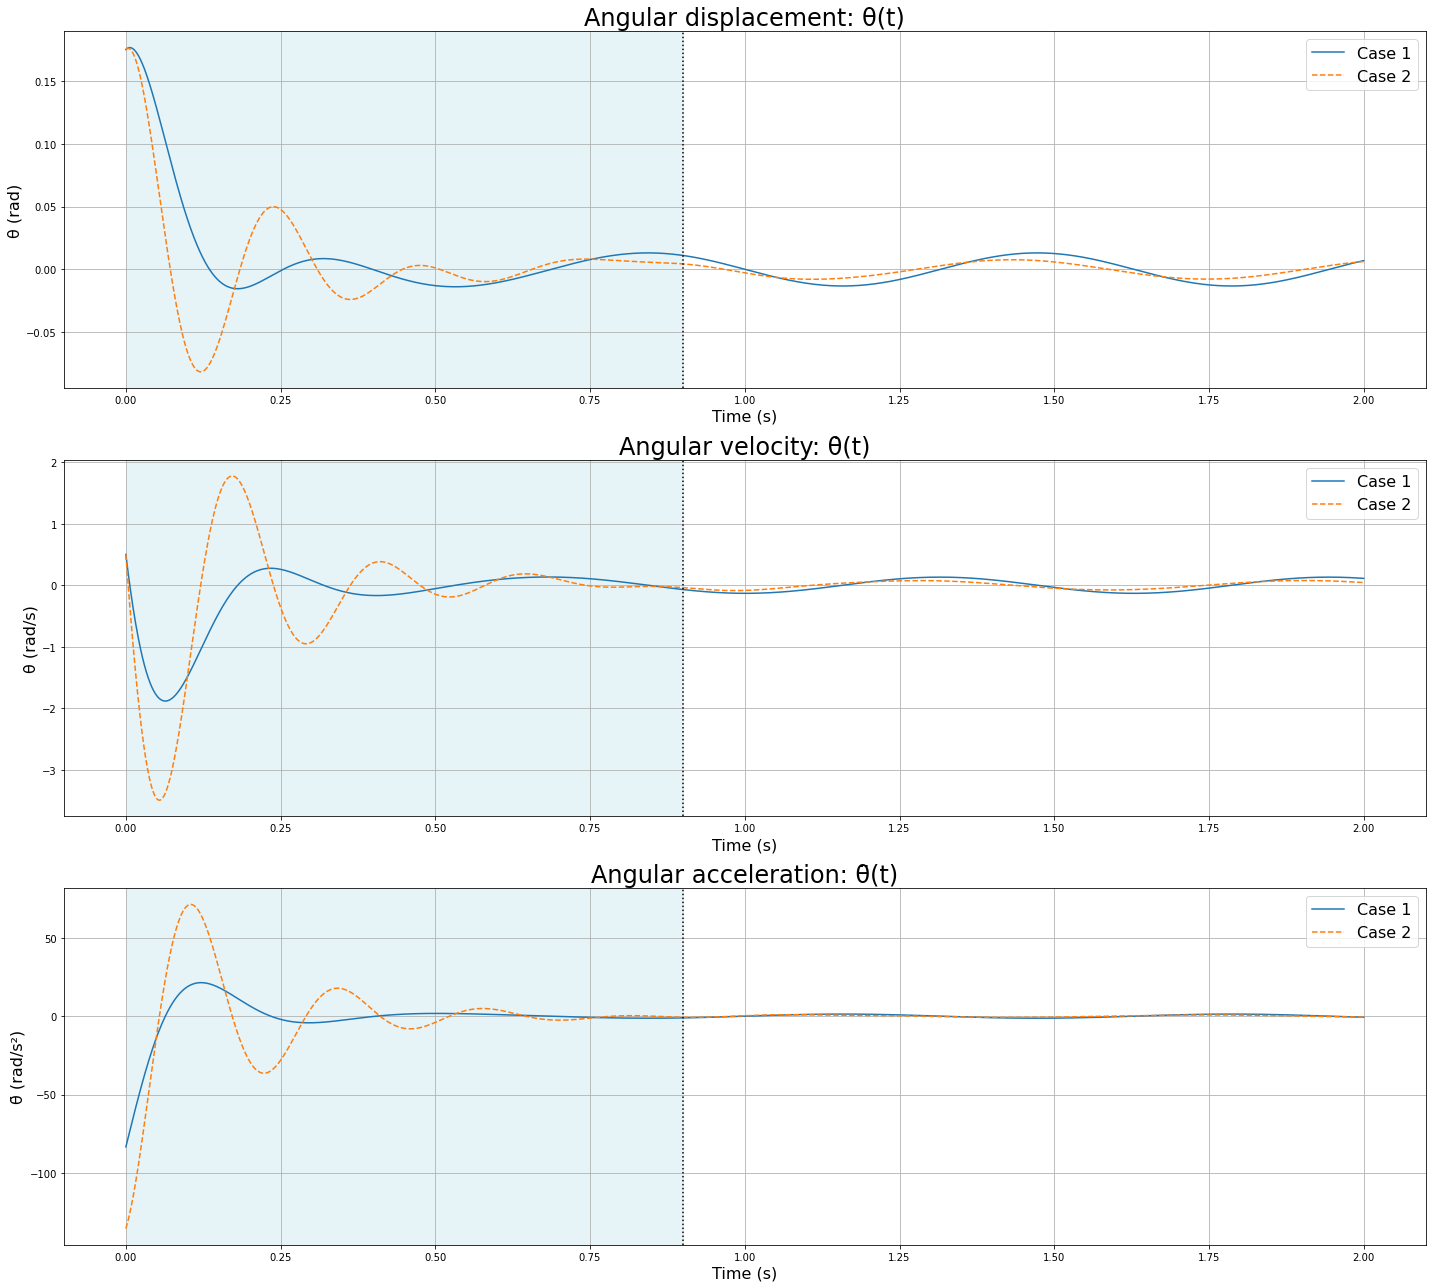

In [10]:
# Create array for points 0 to t that gives the ode solver a bunch of points to solve for
t_eval = np.linspace(0, t, n*t)

# Construct equations of motion for each case
case1 = makecase(m, l, k, c, Fo, w, 1)
case2 = makecase(m, l, k, c, Fo, w, 2)

# Integrate both using the same method that is implemented in ode45
sol1 = solve_ivp(case1, (0,t), (theta_o, w_o), t_eval=t_eval, method='RK45', rtol=1e-8)
sol2 = solve_ivp(case2, (0,t), (theta_o, w_o), t_eval=t_eval, method='RK45', rtol=1e-8)

# Extract arrays
t_sols = sol1.t
theta1 = sol1.y[0]; thetadot1 = sol1.y[1]
theta2 = sol2.y[0]; thetadot2 = sol2.y[1]

# Compute thetaddot using the same equations we used in the ODE solver (easier than differentiating)
thetaddot1 = np.array([case1(ti, yi)[1] for ti, yi in zip(sol1.t, sol1.y.T)])
thetaddot2 = np.array([case2(ti, yi)[1] for ti, yi in zip(sol2.t, sol2.y.T)])

'''
UPDATE THIS VARIABLE TO SPECIFY THE TIME IN SECONDS WHERE TRANSIENT TURNS INTO STEADY STATE RESPONSE
'''
t_to_ss = 0.9

# ---- Plot theta (separate figure) ----
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(t_sols, theta1, label='Case 1')
ax[0].plot(t_sols, theta2, label='Case 2', linestyle='--')
ax[0].set_title('Angular displacement: θ(t)',fontsize=24)
ax[0].set_xlabel('Time (s)', fontsize=16); ax[0].set_ylabel('θ (rad)', fontsize=16)
ax[0].axvspan(0, t_to_ss, color='lightblue', alpha=0.3, zorder=0)
ax[0].axvline(t_to_ss, color='k', linestyle=':', linewidth=1.5, zorder=5)
# ax[0].text(0.15, 0.17, 'Transient', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
# ax[0].text(4.5, 0.17, 'Steady-State', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
# ax[0].text(2, -0.08, "*Note: Transient section shows when both are transient, since case 2 takes longer it shows case 2's transition", fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
ax[0].legend(fontsize=16); ax[0].grid(True)

# ---- Plot theta_dot (separate figure) ----
ax[1].plot(t_sols, thetadot1, label='Case 1')
ax[1].plot(t_sols, thetadot2, label='Case 2', linestyle='--')
ax[1].set_title('Angular velocity: θ̇(t)',fontsize=24)
ax[1].set_xlabel('Time (s)', fontsize=16); ax[1].set_ylabel('θ̇ (rad/s)', fontsize=16)
ax[1].axvspan(0, t_to_ss, color='lightblue', alpha=0.3, zorder=0)
ax[1].axvline(t_to_ss, color='k', linestyle=':', linewidth=1.5, zorder=5)
# ax[1].text(0.3, 1.5, 'Transient', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
# ax[1].text(4.5, 1.5, 'Steady-State', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
# ax[1].text(2, -3.5, "*Note: Transient section shows when both are transient, since case 2 takes longer it shows case 2's transition", fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
ax[1].legend(fontsize=16); ax[1].grid(True)

# ---- Plot theta_ddot (separate figure) ----
ax[2].plot(t_sols, thetaddot1, label='Case 1')
ax[2].plot(t_sols, thetaddot2, label='Case 2', linestyle='--')
ax[2].set_title('Angular acceleration: θ̈(t)',fontsize=24)
ax[2].set_xlabel('Time (s)', fontsize=16); ax[2].set_ylabel('θ̈ (rad/s²)', fontsize=16)
ax[2].axvspan(0, t_to_ss, color='lightblue', alpha=0.3, zorder=0)
ax[2].axvline(t_to_ss, color='k', linestyle=':', linewidth=1.5, zorder=5)
# ax[2].text(0.25, 60, 'Transient', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
# ax[2].text(4.5, 60, 'Steady-State', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
# ax[2].text(2, -135, "*Note: Transient section shows when both are transient, since case 2 takes longer it shows case 2's transition", fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
ax[2].legend(fontsize=16); ax[2].grid(True)

plt.tight_layout()
plt.show()